In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
!pip install scapy
from scapy.all import *
from scapy.layers.inet import IP
from sklearn.ensemble import IsolationForest

import numpy as np
from collections import defaultdict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444345 sha256=dbb27ce519b37516a1b629c9f10e8e1f81976be00a94d6efc74ba0405177086d
  Stored in directory: /root/.cache/pip/wheels/dd/1b/47/d46b1a87e339be501612cf4cd1bf57742e534f9c9aac7b00d6
Successfully built scapy


In [ ]:
#defining the number on nodes in the network or graph
n = 25
#creating a empty undirected graph
G = nx.Graph()
#maintaining the speeds of each node
speed_of_vehicle = [0] * (n+1)

In [ ]:
#adding nodes to the graph
for i in range(n):
  G.add_node(i)
print("The added nodes to the Graph G are:", G.nodes)
#adding edges to the graph so that its fully interconnected
for i in range(n):
  tmp = random.randint(1, n)
  #Round 3 update: The below 2 lines were added to remove the loops that are occured during the network graph generation which is a hypothetical scenario in real world
  if i!=tmp:
    G.add_edge(i,tmp)
  # for j in range(i+1, n):
  #   G.add_edge(i, j, weight=1.0)

The added nodes to the Graph G are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


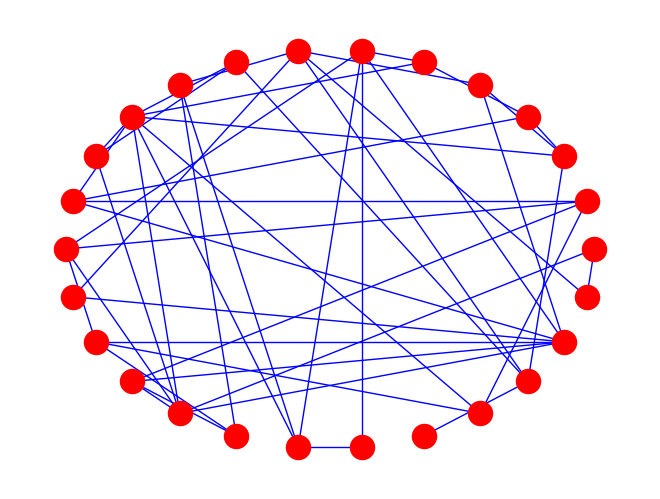

In [ ]:
 nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

In [ ]:
#round 3: Here we use scapy library to send out the packets between pair of nodes in network
for src, dst in G.edges():
    pkt = IP(src="192.168.0."+str(src), dst="192.168.0."+str(dst))/ICMP()
    send(pkt)
    print(pkt.summary())
    time.sleep(1)
def print_pkt(pkt):
    if IP in pkt:
        print(pkt[IP].dst)
filter_exp = "ip dst 172.28.0.15"
# Capture packets sent to 192.168.0.5
pkts = sniff(timeout=10)#, stop_filter=lambda p: True)


Sent 1 packets.
IP / ICMP 192.168.0.0 > 192.168.0.17 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.1 > 192.168.0.13 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.1 > 192.168.0.12 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.2 > 192.168.0.10 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.2 > 192.168.0.4 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.3 > 192.168.0.5 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.5 > 192.168.0.10 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.6 > 192.168.0.19 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.6 > 192.168.0.20 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.6 > 192.168.0.24 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.7 > 192.168.0.25 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.7 > 192.168.0.9 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.7 > 192.168.0.14 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.7 > 192.168.0.23 echo-request 0

Sent 1 packets.
IP / ICMP 192.168.0.

In [ ]:
#round 3: analyze the network packets along with their parameters and raise the flag if there is any possibility of DDOS attack

def analyze(G, num_packets, max_packet_count):
    packet_counts = defaultdict(lambda: defaultdict(int))
    for i in range(num_packets):
        k = random.uniform(0,len(G.edges()))
        k = int(k)
        edge_list = list(G.edges())
        (src_node,dest_node) = edge_list[k]
        packet_counts[src_node][dest_node] += 1
    for i in range(n):
        if random.uniform(1,100)>98:
          speed_of_vehicle[i] = random.randint(76, 100)
          print("A vehicle has high speeds!!")
        else:
          speed_of_vehicle[i] = random.randint(0, 76)
    # Print out packet counts for each pair of nodes
    for src_node in packet_counts:
        for dest_node in packet_counts[src_node]:
            count = packet_counts[src_node][dest_node]
            flag = max(speed_of_vehicle)
            if count > max_packet_count :
                print(f"DDoS attack detected from {src_node} to {dest_node} with {count} packets")

    return packet_counts


In [ ]:
#round 3: We create a arbitrary method that decides the max packets in between a pair of nodes
def get_max_packets(G):
  nodecount = len(G.nodes())
  edgecount = len(G.edges())
  average = nodecount + edgecount
  average /= 2
  return average * 3

In [ ]:
#round 3: Get what is the current threshold for given network size and parameters
threshold = get_max_packets(G)
print("The threshold chosen is:", threshold)

The threshold chosen is: 76.5


In [ ]:
# round 3: Call the analyze function to get packet counts
packet_counts = analyze(G, num_packets = 3000, max_packet_count = get_max_packets(G))

DDoS attack detected from 17 to 24 with 126 packets
DDoS attack detected from 21 to 23 with 109 packets
DDoS attack detected from 7 to 25 with 119 packets
DDoS attack detected from 7 to 9 with 126 packets
DDoS attack detected from 7 to 23 with 129 packets
DDoS attack detected from 7 to 14 with 114 packets
DDoS attack detected from 10 to 17 with 130 packets
DDoS attack detected from 10 to 19 with 110 packets
DDoS attack detected from 10 to 22 with 117 packets
DDoS attack detected from 16 to 24 with 131 packets
DDoS attack detected from 16 to 18 with 112 packets
DDoS attack detected from 8 to 23 with 119 packets
DDoS attack detected from 5 to 10 with 116 packets
DDoS attack detected from 1 to 12 with 119 packets
DDoS attack detected from 1 to 13 with 111 packets
DDoS attack detected from 6 to 20 with 105 packets
DDoS attack detected from 6 to 19 with 153 packets
DDoS attack detected from 6 to 24 with 112 packets
DDoS attack detected from 0 to 17 with 108 packets
DDoS attack detected from

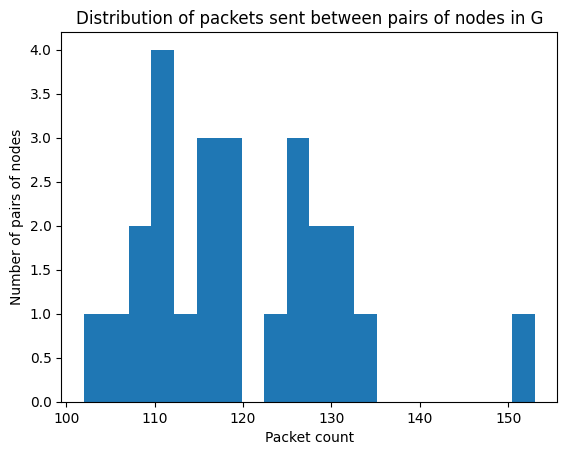

In [ ]:
#round 3: Visualize the packet distribution between pair of nodes inside the network
# Flatten the packet_counts dictionary into a list of packet counts
packet_counts_list = [count for dest_node in packet_counts for count in packet_counts[dest_node].values()]

# Plot a histogram of the packet counts with 20 bins
plt.hist(packet_counts_list, bins=20)

# Add labels and title to the plot
plt.xlabel("Packet count")
plt.ylabel("Number of pairs of nodes")
plt.title("Distribution of packets sent between pairs of nodes in G")

# Display the plot
plt.show()

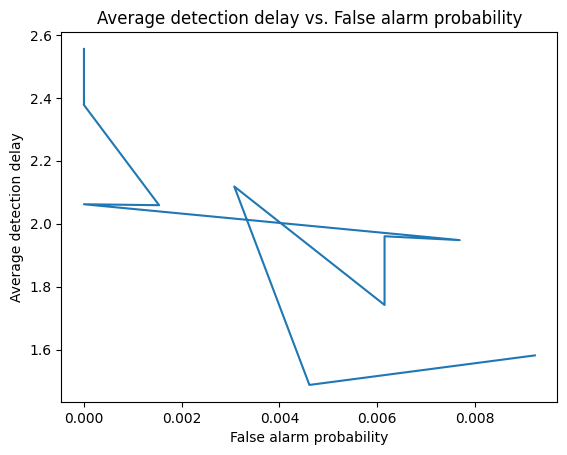

In [ ]:
#round 3: calculate the false alarm probabilities and the average detection delays between the pair of nodes in the network
def analyze1(G, num_packets, max_packet_count, threshold):
    # Initialize dictionary to store packet counts for each pair of nodes
    packet_counts = defaultdict(lambda: defaultdict(int))

    # Generate random packet traffic
    for i in range(num_packets):
        src_node = random.choice(list(G.nodes()))
        dest_node = random.choice(list(G.nodes()))

        # Don't send packets to self
        if src_node == dest_node or (src_node, dest_node) not in G.edges():
            continue

        # Increment packet count for this pair of nodes
        packet_counts[src_node][dest_node] += 1

    # Compute average packet count for each node
    avg_packet_counts = {node: sum(packet_counts[node].values()) / len(packet_counts[node]) for node in G.nodes()}

    # Compute detection delay and false alarm probability
    detection_delay = 0
    false_alarms = 0
    for src_node in packet_counts:
        for dest_node in packet_counts[src_node]:
            count = packet_counts[src_node][dest_node]
            if count > threshold * avg_packet_counts[dest_node]:
                # DDoS attack detected
                detection_delay += count / avg_packet_counts[dest_node]
            elif count > 0.9 * threshold * avg_packet_counts[dest_node]:
                # False alarm
                false_alarms += 1

    avg_detection_delay = detection_delay / len(packet_counts)
    false_alarm_prob = false_alarms / (len(packet_counts) * (len(packet_counts) - 1))

    return avg_detection_delay, false_alarm_prob
#round 3: plot the graph between average detection delay and false alarm probability
thresholds = np.linspace(0.1, 1, 10)
detection_delays = []
false_alarm_probs = []
for threshold in thresholds:
    avg_detection_delay, false_alarm_prob = analyze1(G, num_packets=3000, max_packet_count=10, threshold=threshold)
    detection_delays.append(avg_detection_delay)
    false_alarm_probs.append(false_alarm_prob)

# Plot the results
plt.plot(false_alarm_probs, detection_delays)
plt.xlabel('False alarm probability')
plt.ylabel('Average detection delay')
plt.title('Average detection delay vs. False alarm probability')
plt.show()

In [ ]:
#round 3: create a test data set so to plot the ROC curve
def create_test_data(test_packets):
    # Convert list of packets to a networkx graph
    test_graph = G
    # Convert graph to matrix format (same as training data)
    test_data = matrix_representation(test_graph)
    return test_data

In [ ]:
#round 3: The code below doesnt work as we are unable to flatten the array due to inproper array sizes and are still trying to find the solution for the same
#The below code is for plotting the ROC curve
def generate_packets(num_packets, packet_probabilities):
    """Generate a list of packets based on a given probability distribution.

    Args:
        num_packets (int): Number of packets to generate.
        packet_probabilities (list): A list of probabilities for each type of packet.

    Returns:
        list: A list of generated packets.
    """
    packets = []
    packet_types = len(packet_probabilities)
    for i in range(num_packets):
        # Select a packet type randomly based on the given probabilities
        packet_type = np.random.choice(range(packet_types), p=packet_probabilities)
        # Create a packet with a random source and destination IP address
        packet = (np.random.randint(0, 256, size=4), np.random.randint(0, 256, size=4), packet_type)
        packets.append(packet)
    return packets


In [ ]:

def matrix_representation(G):
    nodes = sorted(G.nodes())
    n = len(nodes)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if G.has_edge(nodes[i], nodes[j]):
                A[i, j] = 1
    return A

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
matrix = matrix_representation(G)
packet_probabilities = [0.1, 0.05, 0.15, 0.22, 0.08, 0.17, 0.03, 0.2]

# Generate test data
test_packets = generate_packets(num_packets=10000, packet_probabilities=packet_probabilities)
test_data = matrix_representation(G)

# Calculate TPR and FPR for each threshold value
thresholds = np.linspace(0, 1, 100)
tprs = []
fprs = []
for threshold in thresholds:
    # Predict labels for test data using the detection system
    y_pred = detect_ddos(G, test_data, threshold)
    # Calculate TPR and FPR
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    tprs.append(tpr)
    fprs.append(fpr)

# Plot ROC curve
plt.plot(fprs, tprs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

NameError: ignored

In [ ]:
128%33

29

In [ ]:
pow(8,8)%55

16